## Initial Setup for importing the dataset

In [12]:
import warnings
warnings.filterwarnings('ignore')
#!pip install seaborn

In [13]:
# !pip install PyDrive

# from pydrive.auth import GoogleAuth
# from pydrive.drive import GoogleDrive
# from google.colab import auth
# from oauth2client.client import GoogleCredentials

# auth.authenticate_user()
# gauth = GoogleAuth()
# gauth.credentials = GoogleCredentials.get_application_default()
# drive = GoogleDrive(gauth)

# downloaded_train = drive.CreateFile({'id':'1ueyp9R3jOkbYtvMjVZ_Cx770CsN_JHsw'})
# downloaded_train.GetContentFile('train.csv')

# downloaded_test = drive.CreateFile({'id':'1X0b1qfYlkvLTe1XD8QVhProb-NpMSInK'})
# downloaded_test.GetContentFile('test.csv')

In [14]:
# !gdown --id 1ueyp9R3jOkbYtvMjVZ_Cx770CsN_JHsw
# !gdown --id 1X0b1qfYlkvLTe1XD8QVhProb-NpMSInK

## Importing required libraries

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.base import ClassifierMixin

import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

## Importing the dataset

In [16]:
dataset_train = pd.read_csv("./Dataset/train.csv")
dataset_test = pd.read_csv("./Dataset/test.csv")
len(dataset_train), len(dataset_test)

(1143, 286)

## Dividing between features and target attributes

In [17]:
X_train = dataset_train.drop('depressed', axis=1)
X_train = X_train.drop('survey_date', axis=1)

X_test = dataset_test.drop('depressed', axis=1)
X_test = X_test.drop('survey_date', axis=1)

In [18]:
Y_train = dataset_train['depressed'].copy()
Y_test = dataset_test['depressed'].copy()

## For filling missing data values

In [19]:
for column in X_train.columns:
    print(f"{column} -- Null values = {X_train[column].isnull().sum().sum()}")

surveyid -- Null values = 0
village -- Null values = 0
femaleres -- Null values = 0
age -- Null values = 0
married -- Null values = 0
children -- Null values = 0
hhsize -- Null values = 0
edu -- Null values = 0
hh_children -- Null values = 0
hh_totalmembers -- Null values = 334
cons_nondurable -- Null values = 0
asset_livestock -- Null values = 0
asset_durable -- Null values = 0
asset_phone -- Null values = 0
asset_savings -- Null values = 0
asset_land_owned_total -- Null values = 0
asset_niceroof -- Null values = 0
cons_allfood -- Null values = 0
cons_ownfood -- Null values = 0
cons_alcohol -- Null values = 43
cons_tobacco -- Null values = 20
cons_med_total -- Null values = 0
cons_med_children -- Null values = 419
cons_ed -- Null values = 0
cons_social -- Null values = 0
cons_other -- Null values = 0
ent_wagelabor -- Null values = 0
ent_ownfarm -- Null values = 0
ent_business -- Null values = 0
ent_nonagbusiness -- Null values = 0
ent_employees -- Null values = 0
ent_nonag_revenue -- 

In [20]:
# Training data filling
for column in X_train.columns:
    count = X_train[column].isnull().sum().sum()
    if count != 0:
        mean_of_column = X_train[column].mean()
        X_train[column].replace(to_replace = np.nan, value=mean_of_column, inplace=True)

In [21]:
# Testing data filling
# Possible Error: Not mentioned in the paper
X_test = X_test.replace('.d', np.nan)
X_test = X_test.astype({'age': 'float'})
for column in X_test.columns:
  count = X_test[column].isnull().sum().sum()
  if count != 0:
    mean = X_test[column].mean()
    X_test[column].replace(to_replace = np.nan, value= mean, inplace=True)

## Implementing the Random forest classifier for feature selection

In [22]:
forest_classifier = RandomForestClassifier(n_estimators=10000, random_state=0, n_jobs=-1)

forest_classifier.fit(X_train, Y_train)

for feature in zip(X_train.columns.values.tolist(), forest_classifier.feature_importances_):
    print(feature)

('surveyid', 0.07161696696872082)
('village', 0.06942616589206276)
('femaleres', 0.007894921599378428)
('age', 0.06857539058610562)
('married', 0.012471646662773363)
('children', 0.03674094829337496)
('hhsize', 0.03456649195546171)
('edu', 0.052684213275524985)
('hh_children', 0.008330156954051909)
('hh_totalmembers', 0.010360819061108235)
('cons_nondurable', 0.016432813493734155)
('asset_livestock', 0.018591681844905752)
('asset_durable', 0.02002833989589627)
('asset_phone', 0.013642270047206587)
('asset_savings', 0.010970887160161006)
('asset_land_owned_total', 0.01151696375370724)
('asset_niceroof', 6.955537623496502e-06)
('cons_allfood', 0.01685008916768938)
('cons_ownfood', 0.016783985259534232)
('cons_alcohol', 0.009488845805344372)
('cons_tobacco', 0.006264688580577835)
('cons_med_total', 0.00969850997208597)
('cons_med_children', 0.0076181923240397804)
('cons_ed', 0.014324384761181806)
('cons_social', 0.02077214136267296)
('cons_other', 0.015939805949369994)
('ent_wagelabor', 0

In [23]:
sfm = SelectFromModel(forest_classifier, threshold=0.006)

sfm.fit(X_train, Y_train)

final_features=[]
for feature_list_index in sfm.get_support(indices=True):
    print(X_train.columns.values.tolist()[feature_list_index])
    final_features.append(X_train.columns.values.tolist()[feature_list_index])
    
print(len(final_features))

surveyid
village
femaleres
age
married
children
hhsize
edu
hh_children
hh_totalmembers
cons_nondurable
asset_livestock
asset_durable
asset_phone
asset_savings
asset_land_owned_total
cons_allfood
cons_ownfood
cons_alcohol
cons_tobacco
cons_med_total
cons_med_children
cons_ed
cons_social
cons_other
ent_nonag_revenue
ent_farmrevenue
ent_farmexpenses
ent_animalstockrev
ent_total_cost
fs_adskipm_often
fs_adwholed_often
fs_chskipm_often
fs_chwholed_often
fs_meat
med_expenses_hh_ep
med_expenses_sp_ep
med_expenses_child_ep
med_portion_sickinjured
med_port_sick_child
med_afford_port
med_sickdays_hhave
med_healthconsult
ed_expenses
ed_expenses_perkid
ed_schoolattend
ed_sch_missedpc
ed_work_act_pc
durable_investment
nondurable_investment
amount_received_mpesa
net_mpesa
saved_mpesa
day_of_week
54


In [24]:
X_train.filter(final_features)
X_test.filter(final_features)

,surveyid,village,femaleres,age,married,children,hhsize,edu,hh_children,hh_totalmembers,...,ed_expenses_perkid,ed_schoolattend,ed_sch_missedpc,ed_work_act_pc,durable_investment,nondurable_investment,amount_received_mpesa,net_mpesa,saved_mpesa,day_of_week
0,901,181,1,21.0,0,3,4,10,3,4.000000,...,0.000000,0.000000,0.000000,0.775476,569.850340,48.166222,0.000000,0.000000,1,3
1,498,47,1,44.0,1,6,8,6,6,8.000000,...,3.651504,0.800000,3.000000,1.600000,252.650100,14.711897,0.000000,0.000000,0,2
2,710,8,1,23.0,1,1,3,7,1,3.000000,...,8.648300,1.000000,1.000000,0.775476,141.736020,0.720692,0.000000,0.000000,1,1
3,433,25,1,67.0,0,0,1,1,0,1.000000,...,15.852179,0.696575,1.263021,0.775476,58.287693,4.804611,0.000000,0.000000,0,3
4,44,2,1,40.0,1,4,6,7,4,6.000000,...,6.826551,1.000000,1.250000,0.750000,440.223750,10.480058,0.000000,0.000000,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
281,255,22,1,25.0,1,1,3,7,0,5.163265,...,15.852179,0.696575,1.263021,0.775476,0.000000,0.000000,0.000000,0.000000,0,1
282,547,69,1,28.0,1,4,6,10,4,6.000000,...,52.583797,0.666667,3.333333,0.500000,182.347700,47.384361,0.000000,0.000000,1,5
283,893,184,1,66.0,0,0,1,1,0,1.000000,...,15.852179,0.696575,1.263021,0.775476,46.444572,0.104545,0.000000,0.000000,0,3
284,363,75,1,51.0,1,1,3,12,0,5.163265,...,15.852179,0.696575,1.263021,0.775476,0.000000,0.000000,0.000000,0.000000,0,3


In [25]:
X_test.replace(to_replace = '.d', value=25, inplace=True)

In [26]:
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.3, random_state=1) # Train-Validation split

## Applying different models to see which yields the best accuracy

### Support Vector Machine

#### Linear Kernel

In [27]:
svm_classifier_linear = LinearSVC(C = 5)
svm_classifier_linear.fit(X_train, Y_train)

LinearSVC(C=5)

#### RBF Kernel

In [28]:
svm_classifier_rbf = SVC(kernel='rbf', C=5)
svm_classifier_rbf.fit(X_train,Y_train)

SVC(C=5)

#### Polynomial Kernel

In [29]:
svm_classifier_poly = SVC(kernel = 'poly', degree=2)
svm_classifier_poly.fit(X_train, Y_train)

SVC(degree=2, kernel='poly')

#### Predictions for each model

In [30]:
Y_pred_svm_linear = svm_classifier_linear.predict(X_val)
Y_pred_svm_rbf = svm_classifier_rbf.predict(X_val)
Y_pred_svm_poly = svm_classifier_poly.predict(X_val)

Classification Report for SVM linear model
              precision    recall  f1-score   support

           0       0.83      0.97      0.90       285
           1       0.20      0.03      0.06        58

    accuracy                           0.81       343
   macro avg       0.52      0.50      0.48       343
weighted avg       0.72      0.81      0.75       343



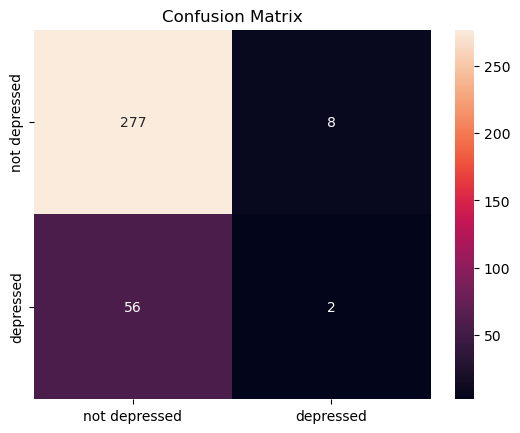

In [31]:
conf_mat = confusion_matrix(Y_val, Y_pred_svm_linear)
df_cm = pd.DataFrame(conf_mat, index = [i for i in ['not depressed', 'depressed']],
                  columns = [i for i in ['not depressed', 'depressed']])
sn.heatmap(df_cm, annot=True, fmt='g')
plt.title('Confusion Matrix')
plt.plot()

print("Classification Report for SVM linear model")
print(classification_report(Y_val, Y_pred_svm_linear))

Classification Report for SVM RBF model
              precision    recall  f1-score   support

           0       0.83      1.00      0.91       285
           1       0.00      0.00      0.00        58

    accuracy                           0.83       343
   macro avg       0.42      0.50      0.45       343
weighted avg       0.69      0.83      0.75       343



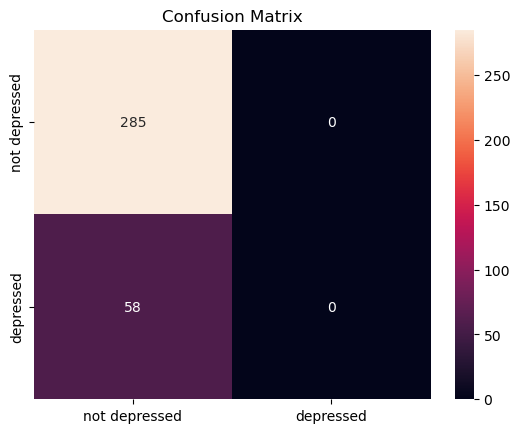

In [32]:
conf_mat = confusion_matrix(Y_val, Y_pred_svm_rbf)
df_cm = pd.DataFrame(conf_mat, index = [i for i in ['not depressed', 'depressed']],
                  columns = [i for i in ['not depressed', 'depressed']])
sn.heatmap(df_cm, annot=True, fmt='g')
plt.title('Confusion Matrix')
plt.plot()

print("Classification Report for SVM RBF model")
print(classification_report(Y_val, Y_pred_svm_rbf))

Classification Report for SVM Polynomial model
              precision    recall  f1-score   support

           0       0.83      1.00      0.91       285
           1       0.00      0.00      0.00        58

    accuracy                           0.83       343
   macro avg       0.42      0.50      0.45       343
weighted avg       0.69      0.83      0.75       343



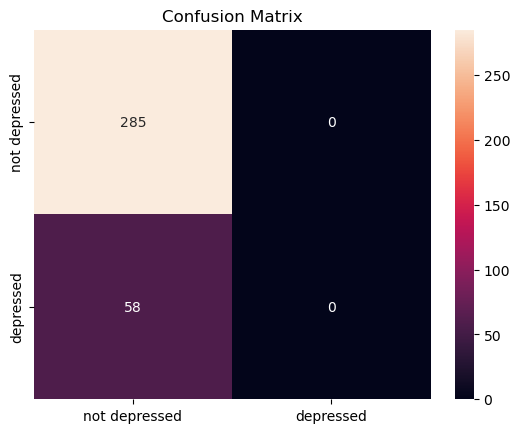

In [33]:
conf_mat = confusion_matrix(Y_val, Y_pred_svm_poly)
df_cm = pd.DataFrame(conf_mat, index = [i for i in ['not depressed', 'depressed']],
                  columns = [i for i in ['not depressed', 'depressed']])
sn.heatmap(df_cm, annot=True, fmt='g')
plt.title('Confusion Matrix')
plt.plot()

print("Classification Report for SVM Polynomial model")
print(classification_report(Y_val, Y_pred_svm_poly))

Best SVM Parameters: {'C': 10, 'degree': 3, 'kernel': 'poly'}
Optimized SVM Classification Report
              precision    recall  f1-score   support

           0       0.83      0.99      0.90       285
           1       0.00      0.00      0.00        58

    accuracy                           0.83       343
   macro avg       0.41      0.50      0.45       343
weighted avg       0.69      0.83      0.75       343



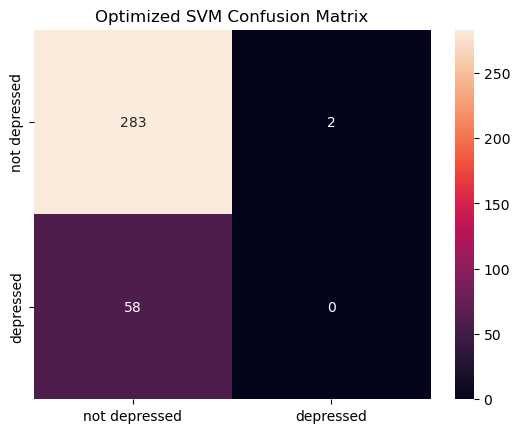

In [34]:
from sklearn.model_selection import StratifiedKFold

svm_params = {'C': [0.1, 1, 10, 100], 'kernel': ['linear', 'rbf', 'poly'], 'degree': [2, 3]}
grid_svm = GridSearchCV(SVC(), svm_params, scoring='accuracy', cv=StratifiedKFold(5), n_jobs=-1)
grid_svm.fit(X_train, Y_train)

print("Best SVM Parameters:", grid_svm.best_params_)
Y_pred_svm_optimized = grid_svm.best_estimator_.predict(X_val)

conf_mat = confusion_matrix(Y_val, Y_pred_svm_optimized)
df_cm = pd.DataFrame(conf_mat, index=['not depressed', 'depressed'],
                     columns=['not depressed', 'depressed'])
sn.heatmap(df_cm, annot=True, fmt='g')
plt.title('Optimized SVM Confusion Matrix')
plt.plot()  
print("Optimized SVM Classification Report")
print(classification_report(Y_val, Y_pred_svm_optimized))


### Logistic Regression

In [35]:
lr_clf = LogisticRegression(solver='liblinear', random_state=0, max_iter=1000)
lr_clf.fit(X_train, Y_train)

Y_pred_lr = lr_clf.predict(X_val)

Classification Report for Logistic Regression model
              precision    recall  f1-score   support

           0       0.84      0.95      0.89       285
           1       0.26      0.09      0.13        58

    accuracy                           0.80       343
   macro avg       0.55      0.52      0.51       343
weighted avg       0.74      0.80      0.76       343



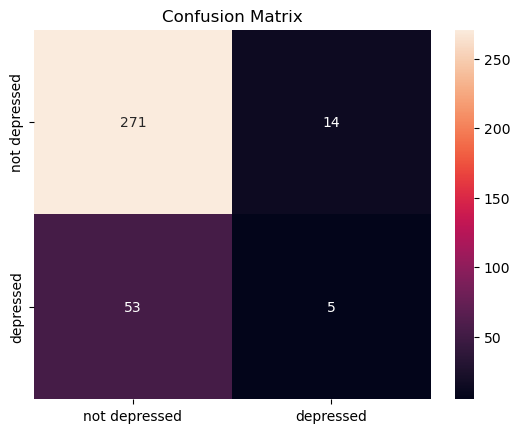

In [36]:
conf_mat = confusion_matrix(Y_val, Y_pred_lr)
df_cm = pd.DataFrame(conf_mat, index = [i for i in ['not depressed', 'depressed']],
                  columns = [i for i in ['not depressed', 'depressed']])
sn.heatmap(df_cm, annot=True, fmt='g')
plt.title('Confusion Matrix')
plt.plot()

print("Classification Report for Logistic Regression model")
print(classification_report(Y_val, Y_pred_lr))

### Decision tree

#### Decision tree_1


In [37]:
decision_tree = DecisionTreeClassifier( criterion = 'gini')
decision_tree.fit(X_train, Y_train)

Y_pred_dt1 = decision_tree.predict(X_val)

Classification Report forDecision Tree 1 model
              precision    recall  f1-score   support

           0       0.83      0.80      0.82       285
           1       0.17      0.21      0.19        58

    accuracy                           0.70       343
   macro avg       0.50      0.50      0.50       343
weighted avg       0.72      0.70      0.71       343



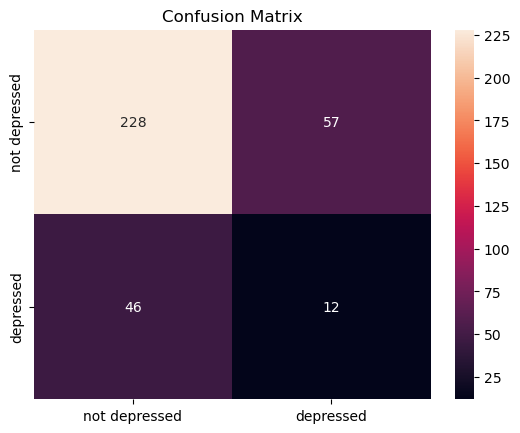

In [38]:
conf_mat = confusion_matrix(Y_val, Y_pred_dt1)
df_cm = pd.DataFrame(conf_mat, index = [i for i in ['not depressed', 'depressed']],
                  columns = [i for i in ['not depressed', 'depressed']])
sn.heatmap(df_cm, annot=True, fmt='g')
plt.title('Confusion Matrix')
plt.plot() 

print("Classification Report forDecision Tree 1 model")
print(classification_report(Y_val, Y_pred_dt1))

#### Decision tree_2

In [39]:
decision_tree = DecisionTreeClassifier( criterion = 'gini', max_depth=5, max_leaf_nodes=10, min_samples_leaf=2, min_samples_split=2, splitter = "random")
decision_tree.fit(X_train, Y_train)

Y_pred_dt2 = decision_tree.predict(X_val)

Classification Report forDecision Tree 2 model
              precision    recall  f1-score   support

           0       0.83      0.99      0.90       285
           1       0.00      0.00      0.00        58

    accuracy                           0.82       343
   macro avg       0.41      0.49      0.45       343
weighted avg       0.69      0.82      0.75       343



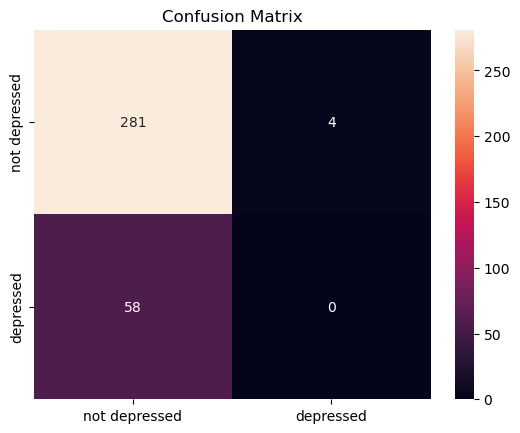

In [40]:
conf_mat = confusion_matrix(Y_val, Y_pred_dt2)
df_cm = pd.DataFrame(conf_mat, index = [i for i in ['not depressed', 'depressed']],
                  columns = [i for i in ['not depressed', 'depressed']])
sn.heatmap(df_cm, annot=True, fmt='g')
plt.title('Confusion Matrix')
plt.plot()

print("Classification Report forDecision Tree 2 model")
print(classification_report(Y_val, Y_pred_dt2))

#### Decision tree_3



In [41]:
decision_tree = DecisionTreeClassifier( criterion = 'entropy', max_depth=6, max_leaf_nodes=10, min_samples_leaf=5, splitter = "best")
decision_tree.fit(X_train, Y_train)

Y_pred_dt3 = decision_tree.predict(X_val)

Classification Report forDecision Tree 3 model
              precision    recall  f1-score   support

           0       0.83      0.99      0.90       285
           1       0.00      0.00      0.00        58

    accuracy                           0.82       343
   macro avg       0.41      0.49      0.45       343
weighted avg       0.69      0.82      0.75       343



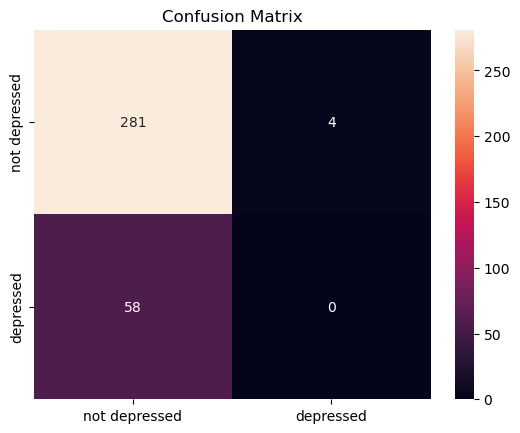

In [42]:
conf_mat = confusion_matrix(Y_val, Y_pred_dt3)
df_cm = pd.DataFrame(conf_mat, index = [i for i in ['not depressed', 'depressed']],
                  columns = [i for i in ['not depressed', 'depressed']])
sn.heatmap(df_cm, annot=True, fmt='g')
plt.title('Confusion Matrix')
plt.plot()

print("Classification Report forDecision Tree 3 model")
print(classification_report(Y_val, Y_pred_dt3))

### Random Forest Optimization 


Best Random Forest Parameters: {'criterion': 'gini', 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 200}
Optimized Random Forest Classification Report
              precision    recall  f1-score   support

           0       0.83      1.00      0.91       285
           1       0.00      0.00      0.00        58

    accuracy                           0.83       343
   macro avg       0.42      0.50      0.45       343
weighted avg       0.69      0.83      0.75       343



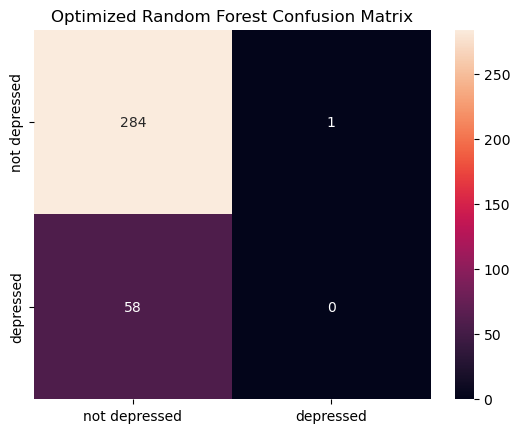

In [43]:
search_space_rf = {
    'n_estimators': [100, 200, 300],
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20],
    'max_features': ['auto', 'sqrt', 'log2'],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_rf = GridSearchCV(RandomForestClassifier(), search_space_rf, scoring='accuracy', cv=StratifiedKFold(5), n_jobs=-1)
grid_rf.fit(X_train, Y_train)

print("Best Random Forest Parameters:", grid_rf.best_params_)
rf_predictions_optimized = grid_rf.best_estimator_.predict(X_val)

conf_mat = confusion_matrix(Y_val, rf_predictions_optimized)
df_cm = pd.DataFrame(conf_mat, index=['not depressed', 'depressed'],
                     columns=['not depressed', 'depressed'])
sn.heatmap(df_cm, annot=True, fmt='g')
plt.title('Optimized Random Forest Confusion Matrix')
plt.plot()
print("Optimized Random Forest Classification Report")
print(classification_report(Y_val, rf_predictions_optimized))


### Gradient Boosting 

Best Gradient Boosting Parameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 200, 'subsample': 0.8}
Optimized Gradient Boosting Classification Report
              precision    recall  f1-score   support

           0       0.83      1.00      0.91       285
           1       0.00      0.00      0.00        58

    accuracy                           0.83       343
   macro avg       0.42      0.50      0.45       343
weighted avg       0.69      0.83      0.75       343



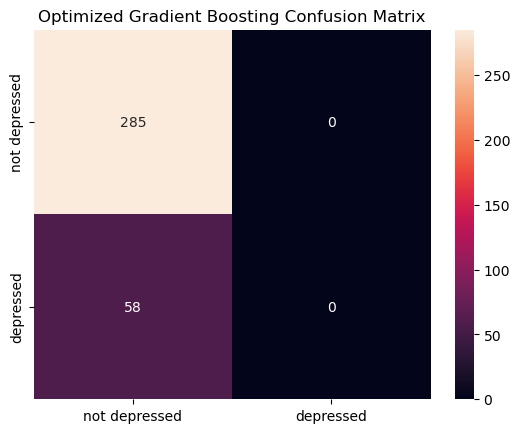

In [44]:
# gb_clf2 = GradientBoostingClassifier()
# grid = {
#     'n_estimators': [10, 20, 50],
#     'max_depth': [3, 5, 10],
#     'max_features': ['auto', 'sqrt', 'log2'],
#     'random_state': [10, 20],
#     'criterion': ['friedman_mse', 'squared_error', 'absolute_error']
# }
# grid_search_model = GridSearchCV(gb_clf2, grid, scoring='accuracy', n_jobs=-1)
# grid_clf2 = grid_search_model.fit(X_train, Y_train)
# predictions = grid_search_model.predict(X_val)

# conf_mat = confusion_matrix(Y_val, predictions)
# df_cm = pd.DataFrame(conf_mat, index = [i for i in ['not depressed', 'depressed']],
#                   columns = [i for i in ['not depressed', 'depressed']])
# sn.heatmap(df_cm, annot=True, fmt='g')
# plt.title('Confusion Matrix')
# plt.plot()

# print("Classification Report for Gradient Boosting")
# print(classification_report(Y_val, predictions))

search_space_gb = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0]
}
grid_gb = GridSearchCV(GradientBoostingClassifier(), search_space_gb, scoring='accuracy', cv=StratifiedKFold(5), n_jobs=-1)
grid_gb.fit(X_train, Y_train)

print("Best Gradient Boosting Parameters:", grid_gb.best_params_)
gb_predictions_optimized = grid_gb.best_estimator_.predict(X_val)

conf_mat = confusion_matrix(Y_val, gb_predictions_optimized)
df_cm = pd.DataFrame(conf_mat, index=['not depressed', 'depressed'],
                     columns=['not depressed', 'depressed'])
sn.heatmap(df_cm, annot=True, fmt='g')
plt.title('Optimized Gradient Boosting Confusion Matrix')
plt.plot()
print("Optimized Gradient Boosting Classification Report")
print(classification_report(Y_val, gb_predictions_optimized))


### Voting 
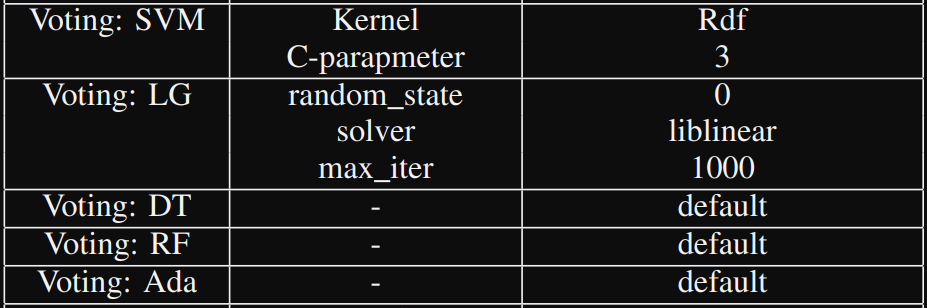

Optimized Voting Ensemble Classification Report
              precision    recall  f1-score   support

           0       0.83      1.00      0.91       285
           1       0.00      0.00      0.00        58

    accuracy                           0.83       343
   macro avg       0.42      0.50      0.45       343
weighted avg       0.69      0.83      0.75       343



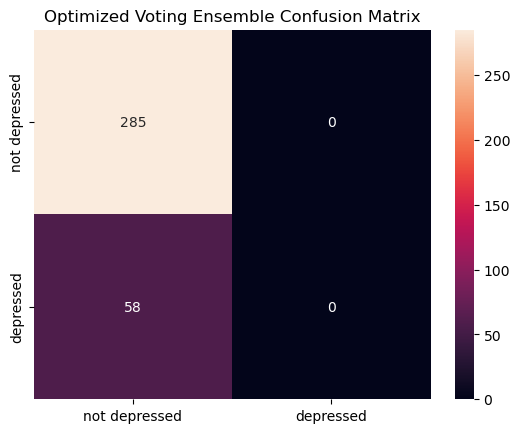

In [45]:
voters_optimized = [
    ('svm', grid_svm.best_estimator_),
    ('lr', LogisticRegression(solver='liblinear', random_state=0, max_iter=1000, C=1)),
    ('dt', DecisionTreeClassifier(max_depth=5)),
    ('rf', grid_rf.best_estimator_),
    ('gb', grid_gb.best_estimator_)
]

v_clf_optimized = VotingClassifier(voters_optimized)
v_clf_optimized.fit(X_train, Y_train)
Y_pred_voting_optimized = v_clf_optimized.predict(X_val)

conf_mat = confusion_matrix(Y_val, Y_pred_voting_optimized)
df_cm = pd.DataFrame(conf_mat, index=['not depressed', 'depressed'],
                     columns=['not depressed', 'depressed'])
sn.heatmap(df_cm, annot=True, fmt='g')
plt.title('Optimized Voting Ensemble Confusion Matrix')
plt.plot()
print("Optimized Voting Ensemble Classification Report")
print(classification_report(Y_val, Y_pred_voting_optimized))


## SVM Voting Classifier

Classification report for Voting ensemble model
              precision    recall  f1-score   support

           0       0.83      0.99      0.90       285
           1       0.00      0.00      0.00        58

    accuracy                           0.83       343
   macro avg       0.41      0.50      0.45       343
weighted avg       0.69      0.83      0.75       343



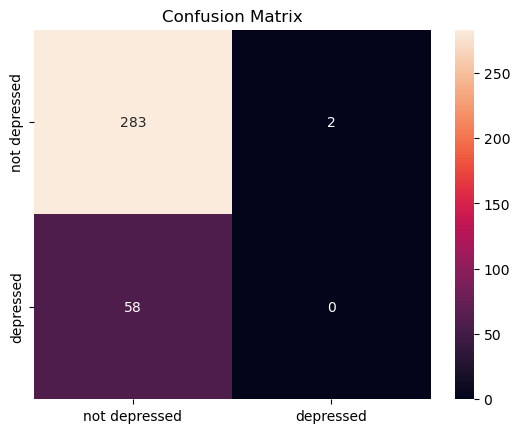

In [47]:
from sklearn.ensemble import VotingClassifier
svm_voting = SVC(kernel='rbf', C=3)
lr_voting = LogisticRegression(solver='liblinear', random_state=0, max_iter=1000)
dt_voting = DecisionTreeClassifier()
rf_voting = RandomForestClassifier()
gb_voting = GradientBoostingClassifier()

voters = [
          ('svm', svm_voting), 
          ('lr', lr_voting), 
          ('dt', dt_voting), 
          ('rf', rf_voting), 
          ('gb', gb_voting)]

v_clf = VotingClassifier(voters)

v_clf.fit(X_train, Y_train)

Y_pred_ve = v_clf.predict(X_val)

conf_mat = confusion_matrix(Y_val, Y_pred_ve)
df_cm = pd.DataFrame(conf_mat, index = [i for i in ['not depressed', 'depressed']],
                  columns = [i for i in ['not depressed', 'depressed']])
sn.heatmap(df_cm, annot=True, fmt='g')
plt.title('Confusion Matrix')
plt.plot()

print("Classification report for Voting ensemble model")
print(classification_report(Y_val, Y_pred_ve))

Classification Report for XGBoost model
              precision    recall  f1-score   support

           0       0.84      0.96      0.90       285
           1       0.31      0.09      0.14        58

    accuracy                           0.81       343
   macro avg       0.58      0.52      0.52       343
weighted avg       0.75      0.81      0.77       343

Accuracy Score for XGBoost model: 0.8134110787172012


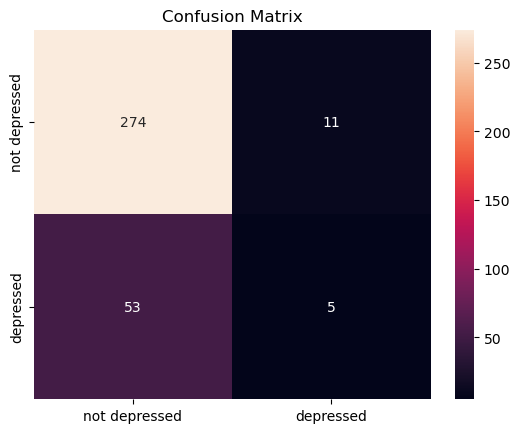

In [66]:
# !pip install xgboost
from xgboost import XGBClassifier

# Extreme Gradient Boosting XGBoost
xgb = XGBClassifier()
xgb.fit(X_train, Y_train)
Y_pred_xgb = xgb.predict(X_val)

# Confusion Matrix for XGBoost
conf_mat = confusion_matrix(Y_val, Y_pred_xgb)
df_cm = pd.DataFrame(conf_mat, index = [i for i in ['not depressed', 'depressed']],
                  columns = [i for i in ['not depressed', 'depressed']])
sn.heatmap(df_cm, annot=True, fmt='g')
plt.title('Confusion Matrix')
plt.plot()

# Classification Report for XGBoost
print("Classification Report for XGBoost model")
print(classification_report(Y_val, Y_pred_xgb))
print(f"Accuracy Score for XGBoost model: {accuracy_score(Y_val, Y_pred_xgb)}")


Best XGBoost Parameters: {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 100, 'subsample': 1.0}
Optimized XGBoost Classification Report
              precision    recall  f1-score   support

           0       0.83      1.00      0.91       285
           1       0.00      0.00      0.00        58

    accuracy                           0.83       343
   macro avg       0.42      0.50      0.45       343
weighted avg       0.69      0.83      0.75       343

Optimized XGBoost Accuracy Score: 0.8309037900874635


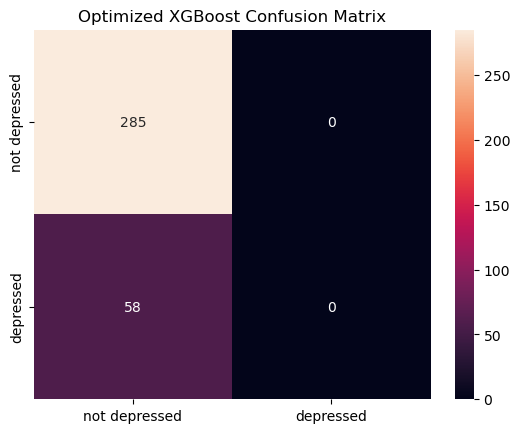

In [67]:
# Parameter tuning for XGBoost
params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0]
}

# Grid Search for XGBoost
grid_xgb = GridSearchCV(XGBClassifier(), params, scoring='accuracy', cv=StratifiedKFold(5), n_jobs=-1)
grid_xgb.fit(X_train, Y_train)

# Best parameters for XGBoost
print("Best XGBoost Parameters:", grid_xgb.best_params_)
xgb_predictions_optimized = grid_xgb.best_estimator_.predict(X_val)

# Confusion Matrix for Optimized XGBoost
conf_mat = confusion_matrix(Y_val, xgb_predictions_optimized)
df_cm = pd.DataFrame(conf_mat, index=['not depressed', 'depressed'],
                     columns=['not depressed', 'depressed'])
sn.heatmap(df_cm, annot=True, fmt='g')
plt.title('Optimized XGBoost Confusion Matrix')
plt.plot()

# Classification Report for Optimized XGBoost
print("Optimized XGBoost Classification Report")
print(classification_report(Y_val, xgb_predictions_optimized))
print(f"Optimized XGBoost Accuracy Score: {accuracy_score(Y_val, xgb_predictions_optimized)}")

In [64]:
from sklearn.metrics import accuracy_score

# Organize into a dataframe
models = ['SVM Linear', 'SVM RBF', 'SVM Polynomial', 'SVM Optimized', 'Logistic Regression', 'Decision Tree 1', 'Decision Tree 2', 'Decision Tree 3', 'Random Forest Optimized', 'Gradient Boosting Optimized', 'Voting Ensemble', 'Voting Ensemble Optimized', 'XGBoost', 'XGBoost Optimized']
accuracy_scores = [accuracy_score(Y_val, Y_pred_svm_linear), accuracy_score(Y_val, Y_pred_svm_rbf), accuracy_score(Y_val, Y_pred_svm_poly), accuracy_score(Y_val, Y_pred_svm_optimized), accuracy_score(Y_val, Y_pred_lr), accuracy_score(Y_val, Y_pred_dt1), accuracy_score(Y_val, Y_pred_dt2), accuracy_score(Y_val, Y_pred_dt3), accuracy_score(Y_val, rf_predictions_optimized), accuracy_score(Y_val, gb_predictions_optimized), accuracy_score(Y_val, Y_pred_ve), accuracy_score(Y_val, Y_pred_voting_optimized), accuracy_score(Y_val, Y_pred_xgb), accuracy_score(Y_val, xgb_predictions_optimized)]
results = pd.DataFrame({'Model': models, 'Accuracy': accuracy_scores})
results = results.sort_values(by='Accuracy', ascending=False)
results

,Model,Accuracy
1,SVM RBF,0.830904
2,SVM Polynomial,0.830904
9,Gradient Boosting Optimized,0.830904
11,Voting Ensemble Optimized,0.830904
13,XGBoost Optimized,0.830904
8,Random Forest Optimized,0.827988
3,SVM Optimized,0.825073
10,Voting Ensemble,0.825073
6,Decision Tree 2,0.819242
7,Decision Tree 3,0.819242
